DIABETES PREDICTION USING DECISION TREE


In [6]:
import pandas as pd

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
dataset = load_diabetes()

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(dataset.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
df_diabetes = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [11]:
#independent and dependent features
X = df_diabetes
Y = dataset.target

In [12]:
#train test split
from sklearn.model_selection import train_test_split    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
#pearson correlation 
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.196083,0.202593,0.367479,0.238894,0.194840,-0.119524,0.228041,0.302274,0.345631
sex,0.196083,1.000000,0.088119,0.229459,0.010085,0.117818,-0.370008,0.301513,0.147678,0.213834
bmi,0.202593,0.088119,1.000000,0.378013,0.217977,0.238805,-0.391322,0.411254,0.432327,0.374699
bp,0.367479,0.229459,0.378013,1.000000,0.224559,0.159546,-0.193113,0.244140,0.399925,0.376167
s1,0.238894,0.010085,0.217977,0.224559,1.000000,0.880910,0.018819,0.548260,0.544285,0.309938
s2,0.194840,0.117818,0.238805,0.159546,0.880910,1.000000,-0.240253,0.661777,0.321811,0.278650
s3,-0.119524,-0.370008,-0.391322,-0.193113,0.018819,-0.240253,1.000000,-0.752319,-0.395944,-0.316024
s4,0.228041,0.301513,0.411254,0.244140,0.548260,0.661777,-0.752319,1.000000,0.624991,0.440174
s5,0.302274,0.147678,0.432327,0.399925,0.544285,0.321811,-0.395944,0.624991,1.000000,0.472258
s6,0.345631,0.213834,0.374699,0.376167,0.309938,0.278650,-0.316024,0.440174,0.472258,1.000000


<Axes: >

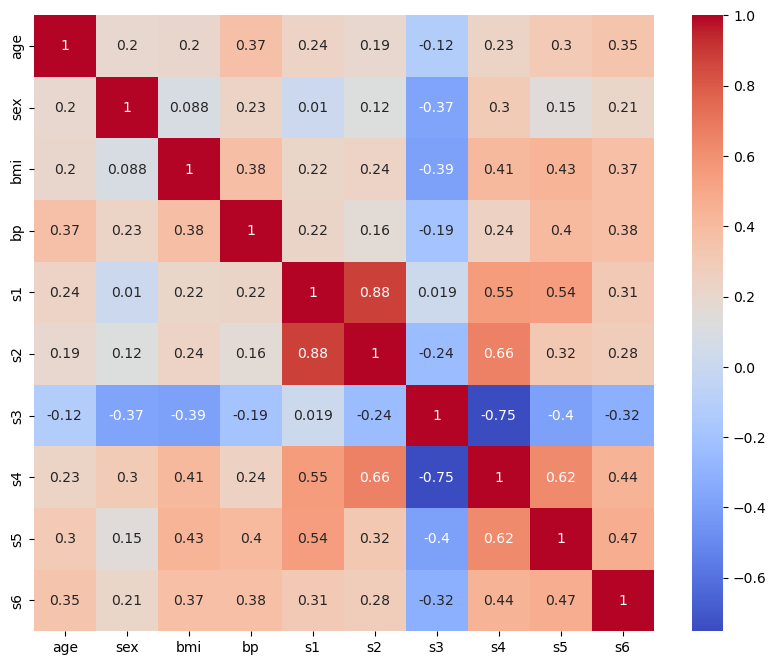

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')

APPLY DECISIONTREEREGRESSOR

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

HYPERPARAMETER TUNING (it is a pre-trunning technique which is used to prevent overfitting)

In [18]:
param={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [1,2,3,4, 5, 10, 15, 20,25],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2']
}
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'splitter': ['best', 'random'],
 'max_features': ['auto', 'sqrt', 'log2']}

In [19]:
from sklearn.model_selection import GridSearchCV

In [21]:
regressor = DecisionTreeRegressor()
grid= GridSearchCV(estimator=regressor, param_grid=param, cv=5, scoring='neg_mean_squared_error')

In [22]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [24]:
#predictions
Y_pred = grid.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [26]:
print("R2 Score:", r2_score(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))      
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))

R2 Score: 0.25434615359526236
Mean Absolute Error: 55.13188447438738
Mean Squared Error: 4661.224245593503


In [27]:
selected_features = DecisionTreeRegressor(criterion='squared_error', max_depth=4, max_features='log2', splitter='best')

In [28]:
selected_features.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4, max_features='log2')

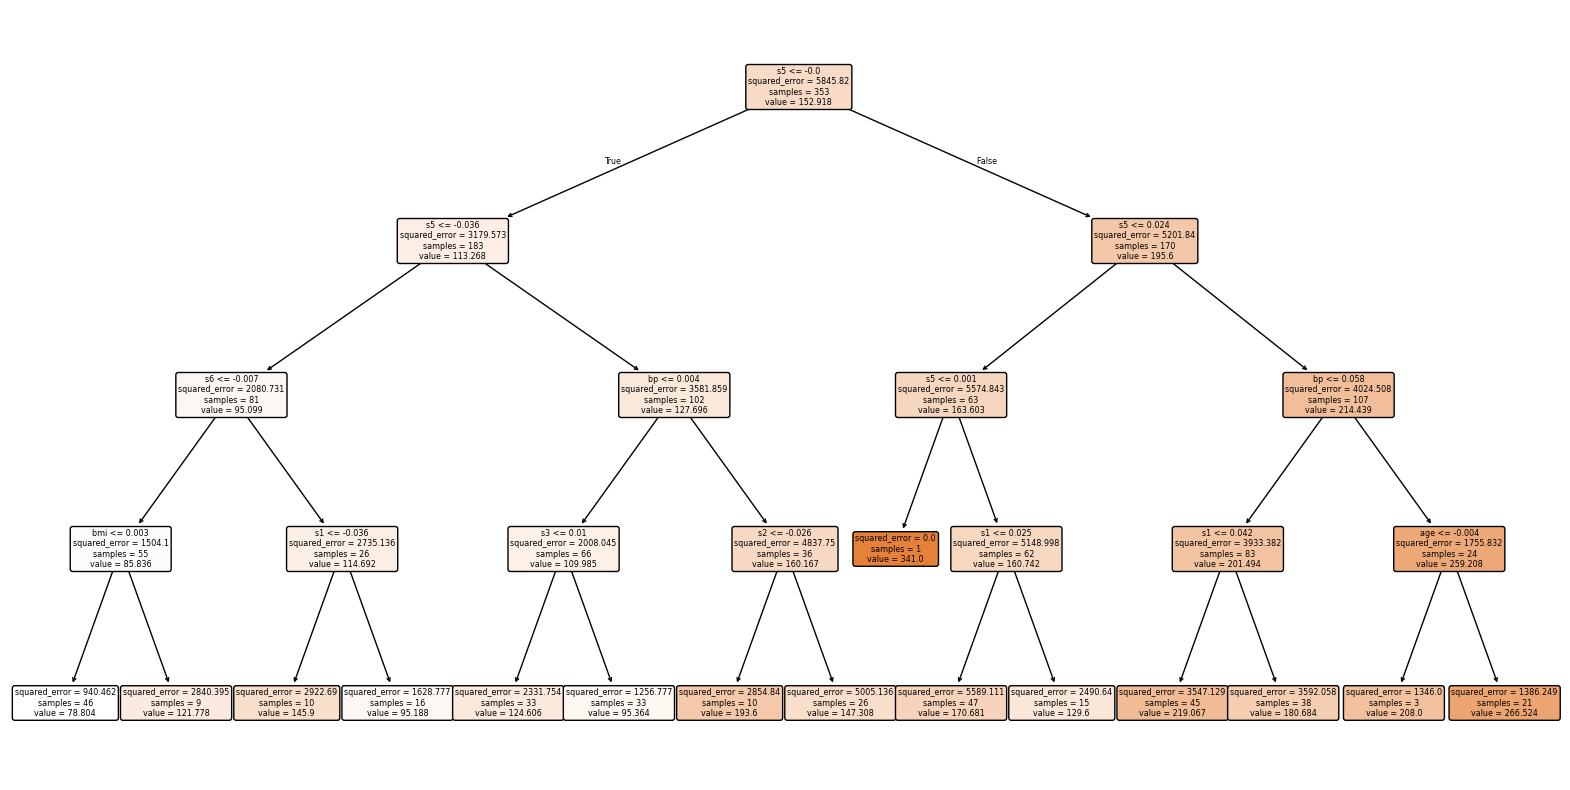

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(selected_features, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()